**In this project, we will try to predict the total number of bikes people rented in a given hour. We will also create a few different machine learning models and evaluate their performance.**

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Here are the descriptions for the relevant columns:
instant - A unique sequential ID number for each row  
dteday - The date of the rentals  
season - The season in which the rentals occurred  
yr - The year the rentals occurred  
mnth - The month the rentals occurred  
hr - The hour the rentals occurred  
holiday - Whether or not the day was a holiday  
weekday - The day of the week (as a number, 0 to 7)  
workingday - Whether or not the day was a working day  
weathersit - The weather (as a categorical variable)  
temp - The temperature, on a 0-1 scale  
atemp - The adjusted temperature  
hum - The humidity, on a 0-1 scale  
windspeed - The wind speed, on a 0-1 scale  
casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)  
registered - The number of registered riders (people who had already signed up)  
cnt - The total number of bike rentals (casual + registered)  

# Load dataset

In [2]:
import pandas as pd

df = pd.read_csv("hour.csv")

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


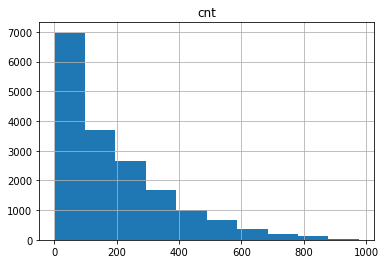

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist('cnt')
plt.show()

In [ ]:
The histogram shows us that the number of bike rentals is skewed right.

In [6]:
# find the correlation between the cnt (The total number of bike rentals) and other columns
corr = df.corr()
sorted_corrs = corr['cnt'].abs().sort_values()
print(sorted_corrs)

weekday       0.026900
workingday    0.030284
holiday       0.030927
windspeed     0.093234
mnth          0.120638
weathersit    0.142426
season        0.178056
yr            0.250495
instant       0.278379
hum           0.322911
hr            0.394071
atemp         0.400929
temp          0.404772
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


# Generate Heat Map

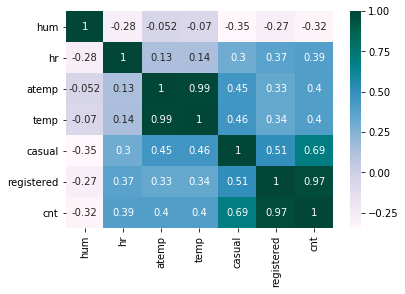

In [7]:
import seaborn as sns

strong_corrs = sorted_corrs[sorted_corrs > .3]

# annot=True displays the dat avalue in each cell and it is easier to spot the strong corrs
sns.heatmap(df[strong_corrs.index].corr(), annot=True, cmap="PuBuGn")

* The heat map shows us that temp and atemp are colinear and since atemp is derived from temp. we can drop it.
* We will also ignore the casual and registered columns because cnt is derived from them. 

In [8]:
cols = ['instant','season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','hum','windspeed']

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

For example, the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

In [9]:
# create a time_label column to depict time intervals when bikes were rented
def assign_label(hr):
    if (hr >=6 and hr < 12):
        return 1
    elif (hr >=12 and hr < 18):
        return 2
    elif (hr >=18 and hr < 24):
        return 3
    elif (hr >=0 and hr < 6):
        return 4

df['time_label'] = df['hr'].apply(assign_label)

In [10]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,3
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,3
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,3
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,3
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49,3


# Split data into train and test

* Select 80% of the rows in bike_rentals to be part of the **training se**t using the sample method on bike_rentals. Assign the result to train.
* Select the rows that are in bike_rentals but not in train to be in the **testing set**. Assign the result to test.

In [11]:
train = df.sample(frac=.8)
print(train.shape)
test = df.loc[~df.index.isin(train.index)]
print(test.shape)

(13903, 18)
(3476, 18)


# Choice of Error metric - MSE

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.

# Applying Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train[cols],train['cnt'])
preds = model.predict(test[cols])
mse = mean_squared_error(test['cnt'],preds)
print(mse)

19685.6458444


In [13]:
# The error seems very high
df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

# Applying Decision Trees

Now we will apply the decision tree algorithm. We will be able to compare its error with the error from linear regression, which will enable us to pick the right algorithm for this data set.

Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(train[cols],train['cnt'])
preds = model.predict(test[cols])
mse = mean_squared_error(test['cnt'],preds)
print(mse)

3141.30955121


In [15]:
# the erros seems lower than that produced from the linear regression model

# Experiment with various parameters of the DecisionTreeRegressor class, including min_samples_leaf, to see if it changes the error.
model = DecisionTreeRegressor(min_samples_leaf=5)
model.fit(train[cols],train['cnt'])
preds = model.predict(test[cols])
mse = mean_squared_error(test['cnt'],preds)
print(mse)

2708.26430252


By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

# Applying Random Forests

Let's now apply the random forest algorithm. Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(min_samples_leaf=5)
model.fit(train[cols],train['cnt'])
preds = model.predict(test[cols])
mse = mean_squared_error(test['cnt'],preds)
print(mse)

1833.66439725


By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.